In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
from seaborn import load_dataset
df=pd.DataFrame(load_dataset("iris"))
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["species"]=encoder.fit_transform(df["species"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [9]:
x=df.drop("species",axis=1)
y=df["species"]

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,train_size=0.86)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((128, 4), (21, 4), (128,), (21,))

In [11]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [12]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_predict=model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))

0.9047619047619048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      0.88      0.88         8
           2       0.86      0.86      0.86         7

    accuracy                           0.90        21
   macro avg       0.91      0.91      0.91        21
weighted avg       0.90      0.90      0.90        21

[[6 0 0]
 [0 7 1]
 [0 1 6]]


In [13]:
from sklearn.tree import DecisionTreeClassifier
model1=DecisionTreeClassifier()
model1.fit(x_train_scaled,y_train)
y_predict1=model1.predict(x_test_scaled)
print(accuracy_score(y_test,y_predict1))
print(classification_report(y_test,y_predict1))
print(confusion_matrix(y_test,y_predict1))

0.9047619047619048
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.88      0.88      0.88         8
           2       0.86      0.86      0.86         7

    accuracy                           0.90        21
   macro avg       0.91      0.91      0.91        21
weighted avg       0.90      0.90      0.90        21

[[6 0 0]
 [0 7 1]
 [0 1 6]]


In [14]:
#pre puning
parms={
    'criterion':['gini','entropy', 'log_loss'],
    'splitter':['best','random'],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
gridcv=GridSearchCV(model1,parms,cv=5)
gridcv.fit(x_train_scaled,y_train)
y_predictgrid=gridcv.predict(x_test_scaled)
y_predictgrid
gridcv.get_params()

c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Us

{'cv': 5,
 'error_score': nan,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': None,
 'estimator__max_leaf_nodes': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__monotonic_cst': None,
 'estimator__random_state': None,
 'estimator__splitter': 'best',
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'param_grid': {'criterion': ['gini', 'entropy', 'log_loss'],
  'splitter': ['best', 'random'],
  'max_features': ['auto', 'sqrt', 'log2']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [15]:
gridcv.best_score_

np.float64(0.9455384615384614)

In [16]:
gridcv.best_params_

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'random'}

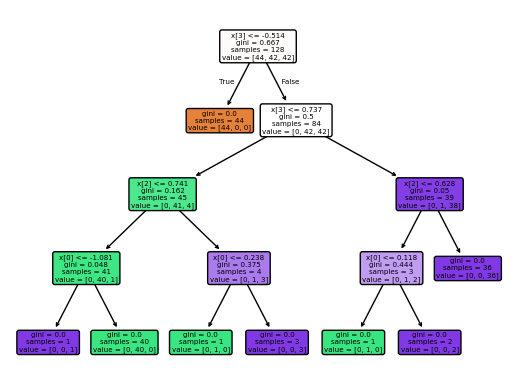

In [22]:
from sklearn import tree
tree.plot_tree(model1,filled=True,rounded=True)
plt.show()

In [28]:
df["species"].value_counts()

species
0    50
1    50
2    49
Name: count, dtype: int64

In [31]:
from sklearn.tree import export_text
tree.export_text(model,max_depth=2,show_weights=True)

'|--- feature_3 <= 0.80\n|   |--- weights: [44.00, 0.00, 0.00] class: 0\n|--- feature_3 >  0.80\n|   |--- feature_3 <= 1.75\n|   |   |--- feature_2 <= 5.05\n|   |   |   |--- truncated branch of depth 2\n|   |   |--- feature_2 >  5.05\n|   |   |   |--- truncated branch of depth 2\n|   |--- feature_3 >  1.75\n|   |   |--- feature_2 <= 4.85\n|   |   |   |--- truncated branch of depth 2\n|   |   |--- feature_2 >  4.85\n|   |   |   |--- weights: [0.00, 0.00, 36.00] class: 2\n'

In [18]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(max_depth=True)   #post puning
model2.fit(x_train_scaled,y_train)
y_predict2=model2.predict(x_test_scaled)
print(accuracy_score(y_test,y_predict2))
print(classification_report(y_test,y_predict2))
print(confusion_matrix(y_test,y_predict2))

0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.53      1.00      0.70         8
           2       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.51      0.67      0.57        21
weighted avg       0.49      0.67      0.55        21

[[6 0 0]
 [0 8 0]
 [0 7 0]]


c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\prasa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

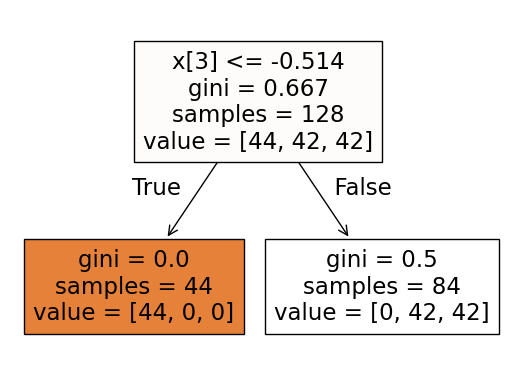

In [19]:
tree.plot_tree(model2,filled=True)
plt.show()

In [20]:
gridcv.cv_results_

{'mean_fit_time': array([0.00029583, 0.00026126, 0.0007175 , 0.00051627, 0.00068212,
        0.00052242, 0.00030971, 0.00024753, 0.00056958, 0.00061932,
        0.00053668, 0.00051532, 0.00024872, 0.00020528, 0.00050712,
        0.00047774, 0.0006741 , 0.00045848]),
 'std_fit_time': array([5.76814125e-05, 3.61725538e-05, 3.27785597e-04, 9.20258655e-06,
        1.63664864e-04, 8.08010378e-06, 1.49074503e-04, 2.95494413e-05,
        6.03279101e-05, 2.12014777e-04, 1.25154994e-05, 9.31066526e-06,
        5.72282865e-05, 4.76121365e-06, 4.51439142e-05, 3.88993338e-05,
        3.57179157e-04, 5.91162701e-06]),
 'mean_score_time': array([0.        , 0.        , 0.00041766, 0.00038743, 0.00057349,
        0.0004003 , 0.        , 0.        , 0.00039401, 0.00040069,
        0.00038819, 0.00044866, 0.        , 0.        , 0.00035973,
        0.0004158 , 0.00036778, 0.00034208]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 4.35708632e-05, 3.31393249e-06,
        2.04128446e-04, 1.35